In [1]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import h5py
import tqdm

In [14]:

root = '/gpfs/radev/pi/saxena/aj764/' 
# only going to do instrumental and cooperation videos right now

In [15]:
df = pd.DataFrame(columns=['directory', 'session', 'vid', 'video type', 'color type', 'preds', 'error', 'lever', 'mag', 'event id', 'neuronal'])
# for paired testing sessions
dircs = ['PairedTestingSessions', 'Training_COOP_Fiber']
d = dircs[0]
sessions = os.listdir(f'{root}/{d}')
for s in tqdm.tqdm(sessions): 
    if 'FiberPho' in s:
        vids = os.listdir(f'{root}/{d}/{s}/Videos/')
        for v in vids:
            if 'Coop' in v or 'IS' in v:
                video_type = 'Coop' if 'Coop' in v else 'IS'
                name = v.split('.')[0]
                date = name.split('_')[0]
                color_type = 'dyed' if (int(date[-2:]) == 24 and int(date[:2]) < 11) else 'collar'
                preds = os.path.exists(f'{root}/{d}/{s}/Tracking/slp/{name}.predictions.slp')
                if preds:
                    with h5py.File(f'{root}/{d}/{s}/Tracking/h5/{name}.predictions.h5','r') as f:
                        locations = f["tracks"][:].T
                    error = np.sum(np.isnan(locations)) / np.prod(locations.shape)
                else:
                    error = np.nan
                lever = os.path.exists (f'{root}/{d}/{s}/Behavioral/processed/lever/{name}_lever.csv')
                mag = os.path.exists(f'{root}/{d}/{s}/Behavioral/processed/mag/{name}_mag.csv')
                if lever:
                    levs = pd.read_csv(f'{root}/{d}/{s}/Behavioral/processed/lever/{name}_lever.csv')
                    event_id = 'RatID' in levs.columns.tolist()
                else:
                    event_id = False
                neuronal = os.path.exists(f'{root}/{d}/{s}/Neuronal/{name}.mat')
                # ['directory', 'session', 'vid', 'video type', 'color type', 'preds', 'error', 'lever', 'mag', 'event id', 'neuronal']
                if neuronal:
                    df.loc[len(df)] = [d, s, v, video_type, color_type, preds, error, lever, mag, event_id, neuronal]

100%|██████████| 230/230 [00:04<00:00, 53.51it/s] 


In [16]:
d = dircs[1]
sessions = os.listdir(f'{root}/{d}')
for s in tqdm.tqdm(sessions): 
    vids = os.listdir(f'{root}/{d}/{s}/')
    vids = [x for x in vids if 'mp4' in x]
    for v in vids:
        video_type = 'Coop'
        name = v.split('.')[0]
        date = name.split('_')[0]
        color_type = 'dyed' if (int(date[-2:]) == 24 and int(date[:2]) < 11) else 'collar'
        preds = os.path.exists(f'{root}/{d}/{s}/{name}.h5')
        if preds:
            with h5py.File(f'{root}/{d}/{s}/{name}.h5','r') as f:
                locations = f["tracks"][:].T
            error = np.sum(np.isnan(locations)) / np.prod(locations.shape)
        else:
            error = np.nan 
        lever = False
        mag = False
        event_id = False
        name = '_'.join(name.split('_')[:-1])
        neuronal = os.path.exists(f'{root}/{d}/{s}/{name}.mat')
        # ['directory', 'session', 'vid', 'video type', 'color type', 'preds', 'error', 'lever', 'mag', 'event id', 'neuronal']
        if neuronal:
            df.loc[len(df)] = [d, s, v, video_type, color_type, preds, error, lever, mag, event_id, neuronal]

100%|██████████| 280/280 [00:01<00:00, 140.54it/s]


In [17]:
df.shape

(462, 11)

In [18]:
coop = df[df['video type'] == 'Coop']
inst =  df[df['video type'] == 'IS']

In [19]:
df

,directory,session,vid,video type,color type,preds,error,lever,mag,event id,neuronal
0,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum10_Coop_KL007G-KL002Y.mp4,Coop,dyed,True,0.001136,True,True,True,True
1,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum14_Coop_KL007G-KL002B.mp4,Coop,dyed,False,NaN,True,True,False,True
2,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum8_Coop_KL007G-KL007Y.mp4,Coop,dyed,True,0.001235,True,True,True,True
3,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum7_IS_KL007G.mp4,IS,dyed,True,0.006277,False,False,False,True
4,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum15_IS_KL007G.mp4,IS,dyed,True,0.007022,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
457,Training_COOP_Fiber,062325_COOPTRAIN_LARGEARENA_FIBER_KF025Y-KF024...,062325_COOPTRAIN_LARGEARENA_FIBER_KF025Y-KF024...,Coop,collar,False,NaN,False,False,False,True
458,Training_COOP_Fiber,060925_COOPTRAIN_LARGEARENA_KF025B-KF024R_Sess...,060925_COOPTRAIN_LARGEARENA_KF025B-KF024R_Sess...,Coop,collar,False,NaN,False,False,False,True
459,Training_COOP_Fiber,060625_COOPTRAIN_LARGEARENA_KM022B-KM027R_Sess...,060625_COOPTRAIN_LARGEARENA_KM022B-KM027R_Sess...,Coop,collar,False,NaN,False,False,False,True
460,Training_COOP_Fiber,062325_COOPTRAIN_LARGEARENA_FIBER_KF026R-KF025...,062325_COOPTRAIN_LARGEARENA_FIBER_KF026R-KF025...,Coop,collar,False,NaN,False,False,False,True


In [20]:
good_fiber = coop[coop['preds'] & coop['lever'] & coop['mag'] & coop['event id'] & (coop['error'] < .2)] # basically useable fiber pho videos in paired testing sessions


In [21]:
good_fiber.to_csv('good_fiber_videos.csv', index=False)

In [22]:
df[df['video type'] == 'Coop'].shape[0], df[df['video type'] == 'IS'].shape[0]

(384, 78)

In [23]:
384+78

462

In [24]:
df[(df['directory'] == 'Training_COOP_Fiber') & df['preds']]

,directory,session,vid,video type,color type,preds,error,lever,mag,event id,neuronal
189,Training_COOP_Fiber,062425_COOPTRAIN_LARGEARENA_FIBER_KM017G-KM017...,062425_COOPTRAIN_LARGEARENA_FIBER_KM017G-KM017...,Coop,collar,True,0.345030,False,False,False,True
195,Training_COOP_Fiber,061825_COOPTRAIN_LARGEARENA_FIBER_KM018B-KM018...,061825_COOPTRAIN_LARGEARENA_FIBER_KM018B-KM018...,Coop,collar,True,0.491309,False,False,False,True
199,Training_COOP_Fiber,062625_COOPTRAIN_LARGEARENA_FIBER_KF018Y-KF018...,062625_COOPTRAIN_LARGEARENA_FIBER_KF018Y-KF018...,Coop,collar,True,0.447788,False,False,False,True
202,Training_COOP_Fiber,062625_COOPTRAIN_LARGEARENA_FIBER_KM017G-KM017...,062625_COOPTRAIN_LARGEARENA_FIBER_KM017G-KM017...,Coop,collar,True,0.143289,False,False,False,True
205,Training_COOP_Fiber,062025_COOPTRAIN_LARGEARENA_FIBER_KM018Y-KM018...,062025_COOPTRAIN_LARGEARENA_FIBER_KM018Y-KM018...,Coop,collar,True,0.535664,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
441,Training_COOP_Fiber,061325_COOPTRAIN_LARGEARENA_FIBER_KM017G-KM017...,061325_COOPTRAIN_LARGEARENA_FIBER_KM017G-KM017...,Coop,collar,True,0.382752,False,False,False,True
445,Training_COOP_Fiber,060325_COOPTRAIN_LARGEARENA_KM017G-KM017R_Sess...,060325_COOPTRAIN_LARGEARENA_KM017G-KM017R_Sess...,Coop,collar,True,0.565833,False,False,False,True
450,Training_COOP_Fiber,060625_COOPTRAIN_LARGEARENA_KM018Y-KM018B_Sess...,060625_COOPTRAIN_LARGEARENA_KM018Y-KM018B_Sess...,Coop,collar,True,0.416581,False,False,False,True
454,Training_COOP_Fiber,060625_COOPTRAIN_LARGEARENA_KM018B-KM018Y_Sess...,060625_COOPTRAIN_LARGEARENA_KM018B-KM018Y_Sess...,Coop,collar,True,0.425776,False,False,False,True


In [25]:
df

,directory,session,vid,video type,color type,preds,error,lever,mag,event id,neuronal
0,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum10_Coop_KL007G-KL002Y.mp4,Coop,dyed,True,0.001136,True,True,True,True
1,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum14_Coop_KL007G-KL002B.mp4,Coop,dyed,False,NaN,True,True,False,True
2,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum8_Coop_KL007G-KL007Y.mp4,Coop,dyed,True,0.001235,True,True,True,True
3,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum7_IS_KL007G.mp4,IS,dyed,True,0.006277,False,False,False,True
4,PairedTestingSessions,090924_FiberPho_KL007G-KL002_TimeOut,090924_Cam1_TrNum15_IS_KL007G.mp4,IS,dyed,True,0.007022,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
457,Training_COOP_Fiber,062325_COOPTRAIN_LARGEARENA_FIBER_KF025Y-KF024...,062325_COOPTRAIN_LARGEARENA_FIBER_KF025Y-KF024...,Coop,collar,False,NaN,False,False,False,True
458,Training_COOP_Fiber,060925_COOPTRAIN_LARGEARENA_KF025B-KF024R_Sess...,060925_COOPTRAIN_LARGEARENA_KF025B-KF024R_Sess...,Coop,collar,False,NaN,False,False,False,True
459,Training_COOP_Fiber,060625_COOPTRAIN_LARGEARENA_KM022B-KM027R_Sess...,060625_COOPTRAIN_LARGEARENA_KM022B-KM027R_Sess...,Coop,collar,False,NaN,False,False,False,True
460,Training_COOP_Fiber,062325_COOPTRAIN_LARGEARENA_FIBER_KF026R-KF025...,062325_COOPTRAIN_LARGEARENA_FIBER_KF026R-KF025...,Coop,collar,False,NaN,False,False,False,True


In [7]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [22]:
vids = os.listdir('/gpfs/radev/pi/saxena/aj764/fiber_videos/pts/Tracking/h5')

In [ ]:
vids

Text(0, 0.5, 'october fiber model')

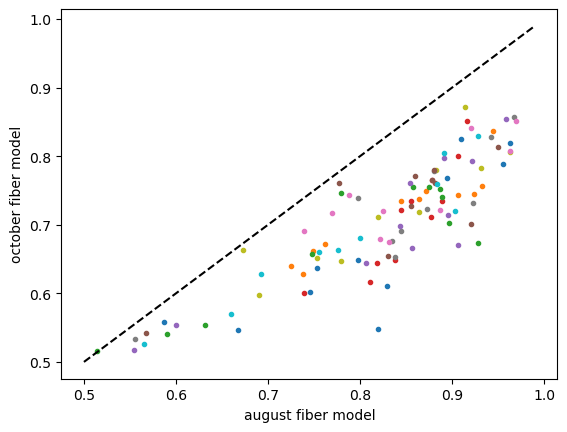

In [24]:
for vid in vids:
    with h5py.File('/gpfs/radev/pi/saxena/aj764/fiber_videos/pts/Tracking/h5/' + vid,'r') as f:
        locations = f["tracks"][:].T
    nan = np.sum(np.isnan(locations)) / np.prod(locations.shape)
    with h5py.File('/gpfs/radev/pi/saxena/aj764/fiber_videos/pts/Tracking_II/h5/' + vid,'r') as f:
        locations = f["tracks"][:].T
    nan_II = np.sum(np.isnan(locations)) / np.prod(locations.shape)
    plt.plot(nan, nan_II, '.')
x = np.arange(.5, 1, .01)
# x = np.arange(.4, .7, .01)
plt.plot(x, x, 'k', linestyle='dashed')
plt.xlabel('august fiber model')
plt.ylabel('october fiber model')

In [2]:
df = pd.read_csv('good_fiber_videos.csv')